# 导入必要的库
导入必要的 Julia 库，例如 DataFrames、CSV、Plots 和 LaTeXStrings。

In [8]:
using DataFrames, CSV
using Plots
using LaTeXStrings

# 读取数据
使用 `CSV.read` 函数读取数据文件，并将其存储为 DataFrame 对象。

In [9]:
# 读取数据
df = CSV.read("../../data/magnetic/Tmu_all_eB.dat", DataFrame)

Row,T,eB,phi1,phi2,phi3,Phi1,Phi2
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,300.0,0.05,-0.0154767,-0.015848,-0.418558,0.839426,0.839442
2,298.0,0.05,-0.0164332,-0.0167919,-0.440622,0.837115,0.837132
3,296.0,0.05,-0.0174252,-0.0177709,-0.463174,0.834756,0.834773
4,294.0,0.05,-0.0184549,-0.0187874,-0.486219,0.832347,0.832365
5,292.0,0.05,-0.0195249,-0.0198438,-0.509756,0.829887,0.829905
6,290.0,0.05,-0.0206378,-0.0209428,-0.533787,0.827374,0.827393
7,288.0,0.05,-0.0217967,-0.0220875,-0.558309,0.824806,0.824826
8,286.0,0.05,-0.0230049,-0.0232809,-0.58332,0.822183,0.822204
9,284.0,0.05,-0.0242659,-0.0245267,-0.608813,0.819502,0.819523


# 筛选固定 eB 的数据
从 DataFrame 中筛选出 eB 等于固定值的数据子集。

In [10]:
# 筛选固定 eB 的数据
function filter_by_eB(df, eB_value)
    return filter(row -> row.eB == eB_value, df)
end

eB_values = unique(df.eB)
filtered_data = Dict(eB => filter_by_eB(df, eB) for eB in eB_values)

Dict{Float64, DataFrame} with 20 entries:
  0.95 => 126×7 DataFrame…
  0.3  => 126×7 DataFrame…
  0.45 => 126×7 DataFrame…
  0.25 => 126×7 DataFrame…
  0.35 => 126×7 DataFrame…
  1.0  => 126×7 DataFrame…
  0.7  => 126×7 DataFrame…
  0.85 => 126×7 DataFrame…
  0.15 => 126×7 DataFrame…
  0.2  => 126×7 DataFrame…
  0.9  => 126×7 DataFrame…
  0.65 => 126×7 DataFrame…
  0.8  => 126×7 DataFrame…
  0.05 => 126×7 DataFrame…
  0.5  => 126×7 DataFrame…
  0.55 => 126×7 DataFrame…
  0.1  => 126×7 DataFrame…
  0.4  => 126×7 DataFrame…
  0.75 => 126×7 DataFrame…
  0.6  => 126×7 DataFrame…

# 计算数值导数 φ'(T)
对筛选后的数据计算 T 和 φ 的数值导数，使用差分方法计算 φ'(T)。

In [11]:
# 计算数值导数 φ'(T)
function compute_derivative(data)
    T = data.T
    phi = data.phi1
    dphi_dT = diff(phi) ./ diff(T)
    T_mid = (T[1:end-1] .+ T[2:end]) ./ 2  # 中间点
    return DataFrame(T_mid=T_mid, dphi_dT=dphi_dT)
end

derivatives = Dict(eB => compute_derivative(filtered_data[eB]) for eB in eB_values)

Dict{Float64, DataFrame} with 20 entries:
  0.8  => 125×2 DataFrame…
  0.95 => 125×2 DataFrame…
  0.3  => 125×2 DataFrame…
  0.5  => 125×2 DataFrame…
  0.55 => 125×2 DataFrame…
  0.1  => 125×2 DataFrame…
  0.45 => 125×2 DataFrame…
  0.25 => 125×2 DataFrame…
  0.35 => 125×2 DataFrame…
  1.0  => 125×2 DataFrame…
  0.7  => 125×2 DataFrame…
  0.4  => 125×2 DataFrame…
  0.85 => 125×2 DataFrame…
  0.15 => 125×2 DataFrame…
  0.2  => 125×2 DataFrame…
  0.9  => 125×2 DataFrame…
  0.65 => 125×2 DataFrame…
  0.75 => 125×2 DataFrame…
  0.05 => 125×2 DataFrame…
  0.6  => 125×2 DataFrame…

# 找到 φ'(T) 最大值对应的 T_max
找到 φ'(T) 的最大值及其对应的 T 值 T_max，并存储结果。

In [12]:
# 找到 φ'(T) 最大值对应的 T_max
function find_T_max(derivative_data)
    idx_max = argmax(derivative_data.dphi_dT)
    return derivative_data.T_mid[idx_max]
end

T_max_values = Dict(eB => find_T_max(derivatives[eB]) for eB in eB_values)

Dict{Float64, Float64} with 20 entries:
  0.95 => 181.0
  0.3  => 201.0
  0.45 => 197.0
  0.25 => 201.0
  0.35 => 199.0
  1.0  => 181.0
  0.7  => 189.0
  0.85 => 183.0
  0.15 => 201.0
  0.2  => 201.0
  0.9  => 183.0
  0.65 => 191.0
  0.8  => 185.0
  0.05 => 201.0
  0.5  => 197.0
  0.55 => 195.0
  0.1  => 201.0
  0.4  => 199.0
  0.75 => 187.0
  0.6  => 193.0

# 绘制 eB-T_max 图像
将 eB 和 T_max 的关系绘制成图像，使用 Plots 库生成可视化。

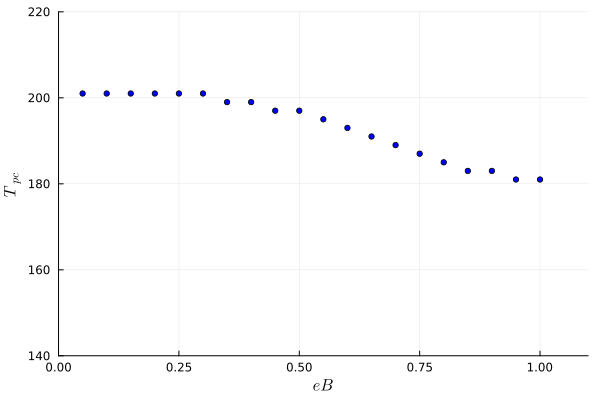

In [21]:
# 绘制 eB-T_max 图像
eB_array = collect(keys(T_max_values))
T_max_array = collect(values(T_max_values))

# 绘制 eB-T_max 散点图
scatter(eB_array, T_max_array, xlabel=L"eB", ylabel=L"T_{pc}", label=false, color=:blue, markersize=3)
plot!(xlim=(0.0,1.1), ylim=(140.0, 220.0))